In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn import feature_selection
from sklearn import tree
from sklearn import model_selection
from sklearn.decomposition import PCA
import pprint

In [44]:
path = os.getcwd()
data = pd.read_csv(path + '\\37513_0001_Data.tsv', delimiter = '\t')

In [3]:
data.shape

(7588, 285)

In [4]:
data.head()

,ID,VARUNIT,WEIGHT,Q1,Q2,Q3,Q5,Q5A,Q7,Q8,...,V_5_UNINSURED,RENTPROB_Y,UTILPROB_Y,UTILSUSP_Y,FOOD_INSEC,UNMETCARE_Y,BILLPROB_Y,MOVE_EVIC,ANY_HARDSHIP,MULT_HARDSHIP
0,1,15,0.4453,1,,0,2,,3,2,...,0,0,0,0,0,0,0,0,0,0
1,2,10,0.2257,1,,2,2,,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,11,1.2001,1,,0,1,,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,2,2.5802,5,2,0,0,,3,3,...,0,0,0,0,1,0,0,0,1,0
4,5,14,0.0828,1,,0,2,,4,1,...,0,0,1,0,0,0,1,0,1,1


Gonna start with standardizing the data because the scales of the data can vary pretty substantially by variable. This data set contains quite a bit of missing data, some of the variables represent answers to questions in the survey that you would only answer if you had answered a previous question. I'm going to find columns who have more than 5% of data missing (380 rows) and just remove those columns. This got rid of 88 columns, but after that we still have 197 variables and the columns we removed had a very large amount of missing data.

In order to use Scikit functions we can't have any missing data so I'll also remove observations with missing data. I'm going to discard observations where values in any of the variables are missing since there aren't too many. This is an example of Complete Case Analysis (CCA) which is handy because it has the advantage of preserving the distribution of variables, provided the data is missing at random and only a small proportion of the data is missing. In this case, CCA resulted in discarding about 6% of the observations. Our complete case includes 7103 observations and 197 features.

In [45]:
# standardize the data


data = data.replace(r'^\s*$', np.NaN, regex=True)

# get rid of columns with more than 5% missing data
drop_columns = data.columns[data.isna().sum()>380].tolist()
data_dropped = data.drop(drop_columns, axis = 1)
data_cca = data_dropped.dropna()

print('Number of total observations: {}'.format(len(data_dropped)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 7588
Number of observations with complete cases: 7103


Let's first visualize distributions of some of the variables using histograms. 

In [6]:
data_cca.columns.tolist()

['ID',
 'VARUNIT',
 'WEIGHT',
 'Q1',
 'Q3',
 'Q5',
 'Q7',
 'Q8',
 'Q10',
 'Q12_1',
 'Q12_2',
 'Q12_3',
 'Q16',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q18_9',
 'Q19_1',
 'Q19_2',
 'Q19_3',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30_1',
 'Q30_2',
 'Q30_3',
 'Q30_4',
 'Q30_5',
 'Q30_6',
 'Q31_1',
 'Q31_2',
 'Q31_3',
 'Q31_4',
 'Q31_5',
 'Q31_7',
 'Q33',
 'Q34',
 'Q35',
 'Q37',
 'Q50_1',
 'Q50_2',
 'Q50_3',
 'Q50_4',
 'Q50_5',
 'Q50_6',
 'Q50_7',
 'Q50_8',
 'Q50_9',
 'Q50_10',
 'Q50_11',
 'Q50_12',
 'Q51',
 'Q52',
 'Q53_1',
 'Q53_7',
 'Q55',
 'Q56_1',
 'Q56_2',
 'Q56_3',
 'Q56_4',
 'Q57_1',
 'Q57_2',
 'Q57_3',
 'Q57_4',
 'Q57_6',
 'Q57_7',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q65',
 'Q66',
 'Q67',
 'PPAGE',
 'PPEDUCAT',
 'PPETHM',
 'PPGENDER',
 'PPHHHEAD',
 'PPINCIMP',
 'PPMSACAT',
 'PPREG4',
 'XACSNET',
 'PPP20197',
 'MARRIED',
 'PARTNER',
 'MAR_PARTNER_MISS',
 'NUM_CHILD_HH',
 'NUM_CHILD_HH_MISS',
 'NUM_OWNCHILD',
 

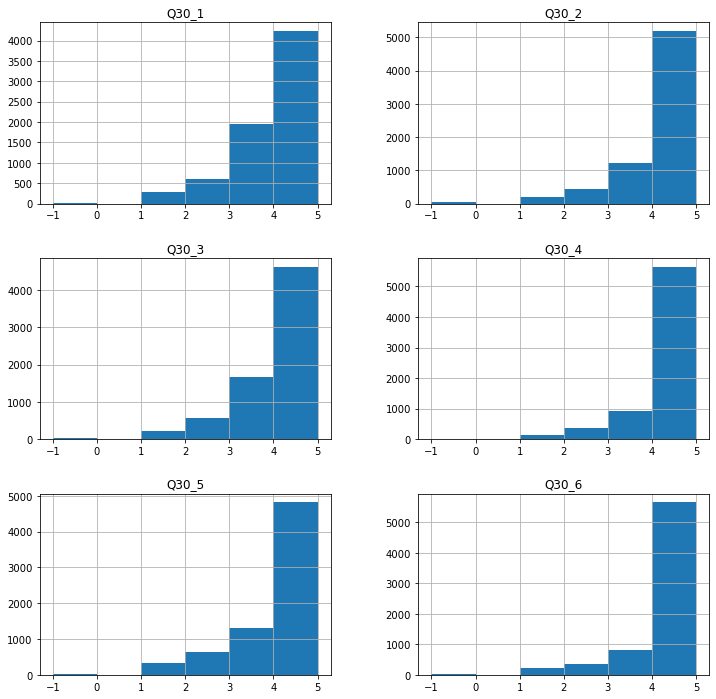

In [7]:
data_cca[['Q30_1',
 'Q30_2',
 'Q30_3',
 'Q30_4',
 'Q30_5',
 'Q30_6']].hist(bins = 6, figsize = (12,12))
plt.show()

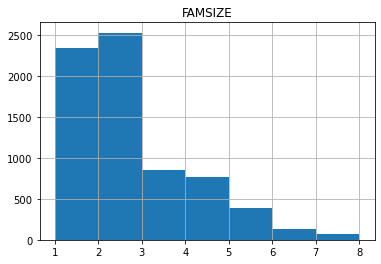

In [229]:
data_cca[['FAMSIZE']].hist(bins = 7)
plt.show()

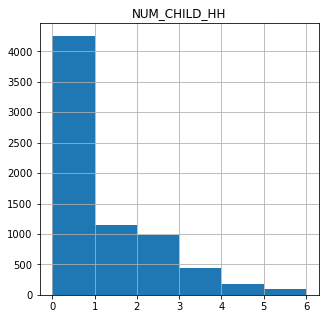

In [230]:
data_cca[['NUM_CHILD_HH']].hist(bins = 6, figsize = (5,5))
plt.show()

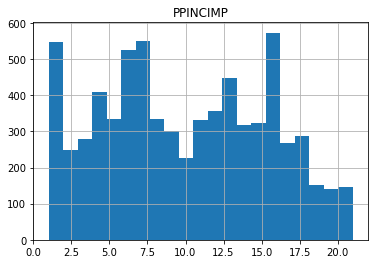

In [231]:
data_cca[['PPINCIMP']].hist(bins = 21)
plt.show()

<AxesSubplot:xlabel='PPINCIMP', ylabel='Density'>

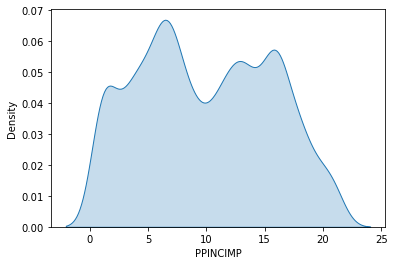

In [232]:
sns.kdeplot(data = data_cca['PPINCIMP'], shade = True, cmap = "PuBu",\
            bw_method = 'silverman')

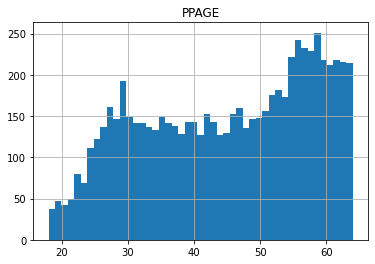

In [233]:
data_cca[['PPAGE']].hist(bins = 47)
plt.show()

<AxesSubplot:xlabel='PPAGE', ylabel='Density'>

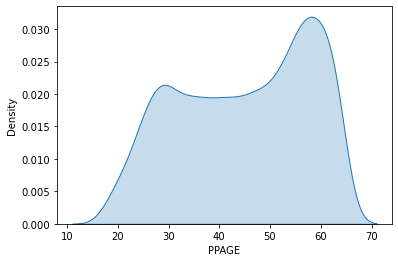

In [234]:
sns.kdeplot(data = data_cca['PPAGE'], shade = True, cmap = "PuBu",\
            bw_method = 'silverman')

In [46]:
pca_out = PCA().fit(data_cca.drop(['WEIGHT','ID','VARUNIT', 'MI_MISS', 'FAMSIZE_MISS', 'MAR_PARTNER_MISS', 'NUM_CHILD_HH_MISS', 'OWNCHILD_MISS'], axis =1))
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_cca.drop(['WEIGHT','ID','VARUNIT', 'MI_MISS', 'FAMSIZE_MISS', 'MAR_PARTNER_MISS', 'NUM_CHILD_HH_MISS', 'OWNCHILD_MISS'], axis =1).columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189
variable,,,,,,,,,,,,,,,,,,,,,
Q1,0.001128,0.036201,-0.105266,0.092896,0.145227,-0.046377,-0.347385,-0.399948,-0.087207,0.175240,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Q3,-0.004791,0.026187,0.010190,-0.268568,-0.820169,-0.149279,-0.327608,-0.318283,0.002940,-0.051445,...,-2.270103e-18,4.680837e-19,-5.108591e-18,5.707441e-18,-6.481653e-19,1.060102e-18,7.740017e-19,1.234613e-18,1.714157e-18,-4.245658e-19
Q5,0.001161,0.016408,0.029746,-0.034753,-0.022836,0.003177,0.056199,0.057544,-0.039505,0.062958,...,3.897104e-17,-4.891943e-19,3.350118e-18,-1.282098e-17,-1.346052e-17,2.657145e-18,1.630532e-18,9.800100e-19,4.631709e-18,5.660846e-19
Q7,0.001823,0.005167,-0.057400,0.006106,0.023114,-0.012458,-0.051699,-0.054396,-0.091732,0.106587,...,3.375681e-17,-1.343026e-17,-1.501985e-17,3.016612e-17,1.876257e-17,-1.130524e-18,-9.734271e-19,-1.753226e-18,1.257676e-18,1.393922e-18
Q8,0.001495,0.007160,-0.034453,-0.003521,0.008576,-0.003852,-0.015917,-0.018678,-0.046683,0.054196,...,-5.828468e-17,1.238318e-18,2.177013e-17,-3.526089e-17,-4.116805e-17,-1.596096e-18,1.375146e-18,5.928865e-18,4.192496e-18,-1.716927e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNMETCARE_Y,0.000754,0.000868,-0.018274,-0.033474,0.010724,-0.013364,-0.005367,0.016895,-0.013627,0.006817,...,1.638250e-16,1.725985e-16,-1.328765e-17,1.297160e-16,-9.330605e-17,3.234398e-18,2.436035e-18,1.404898e-18,-1.711210e-18,-3.470963e-18
BILLPROB_Y,0.000942,-0.000337,-0.018274,-0.040618,0.009273,-0.008268,-0.005238,0.019686,-0.003074,0.009063,...,-1.352230e-16,5.288887e-18,-4.533052e-18,1.755380e-17,-3.038408e-18,4.652065e-19,3.014979e-18,3.161499e-18,4.559515e-18,1.641627e-18
MOVE_EVIC,0.000185,0.000376,-0.001398,-0.001897,-0.000145,-0.000465,-0.002449,0.003155,-0.001930,0.003162,...,1.176745e-16,1.933047e-16,1.402353e-16,-4.887753e-17,-1.560534e-17,4.904481e-19,2.250606e-19,2.359191e-18,-1.829300e-18,7.576702e-18


In [55]:
loadings_df['PC1'].nlargest(4)

variable
Q60             0.013692
NUM_CHILD_HH    0.012620
NUM_OWNCHILD    0.008049
FAMSIZE         0.007397
Name: PC1, dtype: float64

In [52]:
loadings_df['PC2'].nlargest(4)

variable
Q1              0.036201
Q51             0.035998
NUM_CHILD_HH    0.026402
Q3              0.026187
Name: PC2, dtype: float64

In [437]:
loadings_df['PC3'].nlargest(4)

variable
PPINCIMP    0.881842
Q66         0.125509
Q65         0.110048
Q30_2       0.073536
Name: PC3, dtype: float64

In [439]:
loadings_df['PC4'].nlargest(4)

variable
Q30_5    0.153994
Q30_2    0.150783
Q30_6    0.134941
Q30_1    0.132522
Name: PC4, dtype: float64

## General Health

In [17]:
# try to predict Q27 "In general, would you say your health is"

X_train, X_test, y_train, y_test = train_test_split(
    data_cca.drop(['WEIGHT','ID','VARUNIT','Q27'], axis=1), data_cca['Q27'], test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
reg = linear_model.LinearRegression()

y_pred = reg.fit(X_train, y_train).predict(X_test)
print("Linear Regression Accuracy", (y_test == np.round(y_pred)).sum()/X_test.shape[0])

Linear Regression Accuracy 0.5123152709359606


In [10]:
reg.score(X_train, y_train)

0.40039448187953675

Our linear regression model to predict responses of general health has an accuracy of 51%. This is before any feature selection or dimensionality reduction.

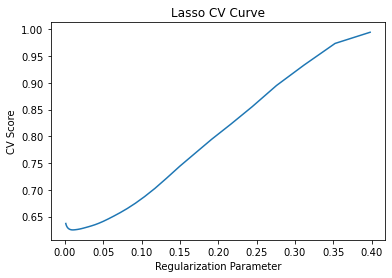

In [11]:
alphas_lasso = np.logspace(-3,-.4, num =50)
scores_lasso = []

for alpha in alphas_lasso:
    mod = linear_model.Lasso(alpha=alpha)
    cv = model_selection.RepeatedKFold(n_splits = 5, random_state = 12)
    score = model_selection.cross_val_score(mod, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    scores_lasso.append(abs(score))

plt.plot(alphas_lasso, scores_lasso)
plt.title('Lasso CV Curve')
plt.xlabel('Regularization Parameter')
plt.ylabel('CV Score')
plt.show()

In [12]:
best_alpha = alphas_lasso[scores_lasso.index(min(scores_lasso))]
best_alpha

0.01018974381401994

In [18]:
# Lasso

reg_lasso = linear_model.Lasso(alpha=0.01)
reg_l = reg_lasso.fit(X_train, y_train)
y_pred_l = reg_l.predict(X_test)
print("Lasso Regression Accuracy", (y_test == np.round(y_pred_l)).sum()/X_test.shape[0])

Lasso Regression Accuracy 0.5207600281491908


In [19]:
reg_l.score(X_train, y_train)

0.38953891315394473

(0.3981071705534972, 0.001)

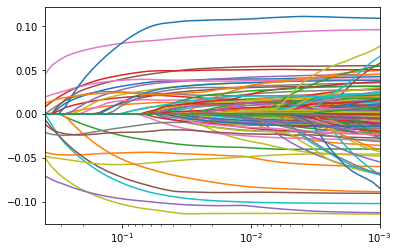

In [23]:
#https://learning.oreilly.com/library/view/building-machine-learning/9781788623223/891f7635-a9a5-454b-9894-ee9085492b94.xhtml
las = linear_model.Lasso() 
alphas = alphas_lasso 
alphas, coefs, _= las.path(X_train, y_train,
                           alphas=alphas) 

fig,ax = plt.subplots() 
ax.plot(alphas, coefs.reshape(193,50).T) 
# Set log scale 
ax.set_xscale('log') 
# Make alpha decrease from left to right 
ax.set_xlim(alphas.max(), alphas.min()) 

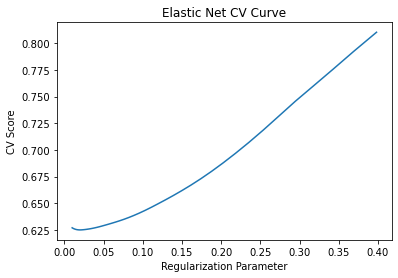

In [13]:
alphas_en = np.logspace(-2,-.4, num =50)
scores_en = []

for alpha in alphas_en:
    mod = linear_model.ElasticNet(alpha=alpha)
    cv = model_selection.RepeatedKFold(n_splits = 5, random_state = 12)
    score = model_selection.cross_val_score(mod, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    scores_en.append(abs(score))

plt.plot(alphas_en, scores_en)
plt.title('Elastic Net CV Curve')
plt.xlabel('Regularization Parameter')
plt.ylabel('CV Score')
plt.show()

In [14]:
best_en_alpha = alphas_en[scores_en.index(min(scores_en))]
best_en_alpha

0.019673315239630437

In [15]:
# Elastic Net

reg_en = linear_model.ElasticNet(alpha=0.019)
reg_net = reg_en.fit(X_train, y_train)
y_pred_en = reg_net.predict(X_test)
print("Elastic Net Regression Accuracy", (y_test == np.round(y_pred_en)).sum()/X_test.shape[0])

Elastic Net Regression Accuracy 0.5193525686136523


In [16]:
reg_en.score(X_train, y_train)

0.38983258048638325

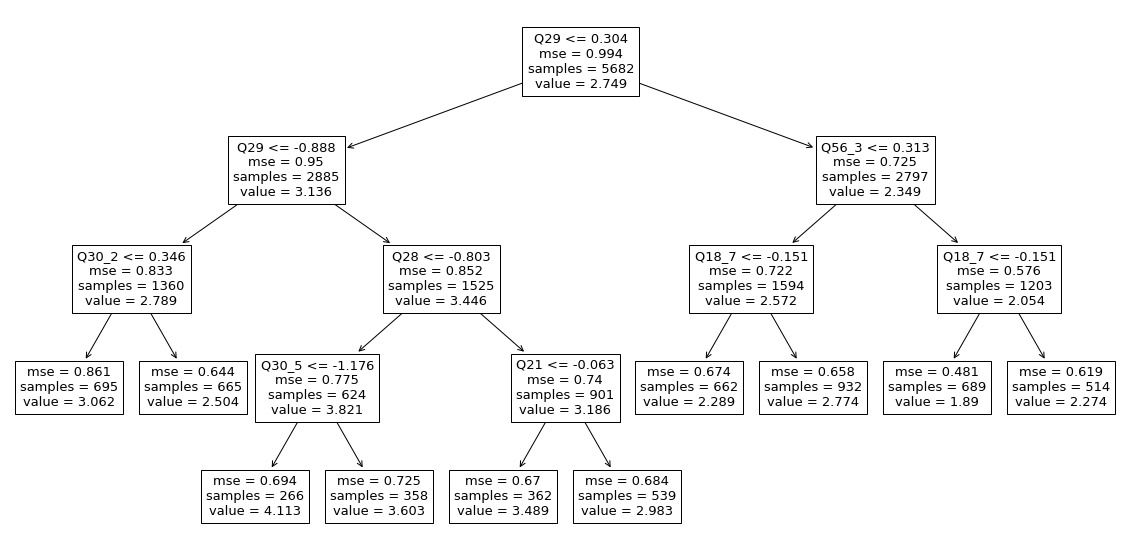

In [24]:
# CART

CART = tree.DecisionTreeRegressor(random_state = 0, max_depth = 5, max_leaf_nodes = 10)
CART = CART.fit(X_train,y_train)
plt.figure(figsize = (20,10))
tree.plot_tree(CART, feature_names = data_cca.drop(['WEIGHT','ID','VARUNIT', 'Q27'], axis=1).columns)
plt.show()

In [25]:
cart_paras = data_cca.drop(['WEIGHT','ID','VARUNIT', 'Q27'], axis=1).columns[[29, 65, 31, 28, 16, 34, 22]]
cart_paras

Index(['Q29', 'Q56_3', 'Q30_2', 'Q28', 'Q18_7', 'Q30_5', 'Q21'], dtype='object')

In [385]:
y_pred_CART = CART.predict(X_test)
print("CART Accuracy", (y_test == np.round(y_pred_CART)).sum()/X_test.shape[0])


CART Accuracy 0.47712878254750174


Most important features according to Lasso:

In [386]:
np.where(reg_l.coef_ != 0)

(array([ 10,  11,  13,  14,  16,  17,  18,  28,  29,  31,  32,  34,  45,
         63,  65,  66,  77,  78,  80,  81,  85, 191], dtype=int64),)

In [392]:
lr_paras = data_cca.drop(['WEIGHT', 'ID','VARUNIT','Q27'], axis=1).columns[np.where(reg_l.coef_ != 0)]
lr_paras

Index(['Q18_1', 'Q18_2', 'Q18_4', 'Q18_5', 'Q18_7', 'Q18_9', 'Q19_1', 'Q28',
       'Q29', 'Q30_2', 'Q30_3', 'Q30_5', 'Q37', 'Q56_1', 'Q56_3', 'Q56_4',
       'Q65', 'Q66', 'PPAGE', 'PPEDUCAT', 'PPINCIMP', 'ANY_HARDSHIP'],
      dtype='object')

In [388]:
data_cca.drop(['WEIGHT', 'ID','VARUNIT','Q27'], axis=1).columns[np.where(max(abs(reg_l.coef_)))]

Index(['Q1'], dtype='object')

Most important features according to Elastic Net:

In [391]:
en_paras = data_cca.drop(['WEIGHT','ID','VARUNIT','Q27'], axis=1).columns[np.where(reg_net.coef_ != 0)]
en_paras

Index(['Q10', 'Q18_1', 'Q18_2', 'Q18_4', 'Q18_5', 'Q18_7', 'Q18_9', 'Q19_1',
       'Q28', 'Q29', 'Q30_2', 'Q30_3', 'Q30_5', 'Q37', 'Q50_1', 'Q56_1',
       'Q56_3', 'Q56_4', 'Q65', 'Q66', 'PPAGE', 'PPEDUCAT', 'PPINCIMP',
       'ANY_HARDSHIP'],
      dtype='object')

In [390]:
data_cca.drop(['WEIGHT', 'ID','VARUNIT','Q27'], axis=1).columns[np.where(max(abs(reg_net.coef_)))]

Index(['Q1'], dtype='object')

In [378]:
list(set(lr_paras).intersection(en_paras))

['Q18_2',
 'Q18_1',
 'Q30_3',
 'Q29',
 'Q18_9',
 'Q18_7',
 'Q56_4',
 'ANY_HARDSHIP',
 'Q37',
 'Q18_4',
 'PPINCIMP',
 'Q56_3',
 'PPEDUCAT',
 'Q30_5',
 'Q28',
 'Q56_1',
 'Q65',
 'Q19_1',
 'Q18_5',
 'Q30_2',
 'Q66',
 'PPAGE']

## Sadness
Predicting Question 30_4 "During the past 30 days, about how often did you feel so sad that nothing could cheer you up?"

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    data_cca.drop(['WEIGHT','ID','VARUNIT','Q30_4'], axis=1), data_cca['Q30_4'], test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
reg = linear_model.LinearRegression()

y_pred = reg.fit(X_train, y_train).predict(X_test)
print("Linear Regression Accuracy", (y_test == np.round(y_pred)).sum()/X_test.shape[0])

Linear Regression Accuracy 0.7030260380014075


In [28]:
reg.score(X_train, y_train)

0.693414859443847

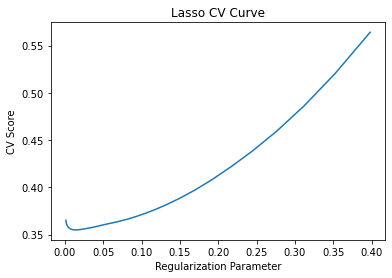

In [29]:
alphas_lasso = np.logspace(-3,-.4, num =50)
scores_lasso = []

for alpha in alphas_lasso:
    mod = linear_model.Lasso(alpha=alpha)
    cv = model_selection.RepeatedKFold(n_splits = 5, random_state = 12)
    score = model_selection.cross_val_score(mod, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    scores_lasso.append(abs(score))

plt.plot(alphas_lasso, scores_lasso)
plt.title('Lasso CV Curve')
plt.xlabel('Regularization Parameter')
plt.ylabel('CV Score')
plt.show()

In [31]:
best_alpha = alphas_lasso[scores_lasso.index(min(scores_lasso))]
best_alpha

0.014701002071295976

In [32]:
#lasso

reg_lasso = linear_model.Lasso(alpha=best_alpha)
reg_l = reg_lasso.fit(X_train, y_train)
y_pred_l = reg_l.predict(X_test)
print("Lasso Regression Accuracy", (y_test == np.round(y_pred_l)).sum()/X_test.shape[0])

Lasso Regression Accuracy 0.7114707952146376


In [33]:
reg_l.score(X_train, y_train)

0.6836191198218085

In [333]:
np.where(reg_l.coef_ != 0)

(array([ 31,  32,  33,  34,  35,  45,  66,  85, 187], dtype=int64),)

In [334]:
lasso_paras = data_cca.drop(['WEIGHT', 'ID','VARUNIT','Q30_4'], axis=1).columns[np.where(reg_l.coef_ != 0)]
lasso_paras

Index(['Q30_1', 'Q30_2', 'Q30_3', 'Q30_5', 'Q30_6', 'Q37', 'Q56_4', 'PPINCIMP',
       'FOOD_INSEC'],
      dtype='object')

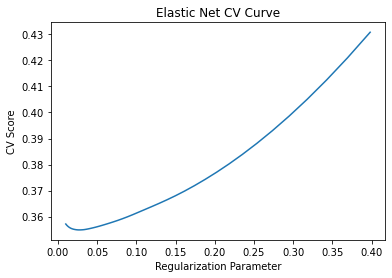

In [35]:
alphas_en = np.logspace(-2,-.4, num =50)
scores_en = []

for alpha in alphas_en:
    mod = linear_model.ElasticNet(alpha=alpha)
    cv = model_selection.RepeatedKFold(n_splits = 5, random_state = 12)
    score = model_selection.cross_val_score(mod, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    scores_en.append(abs(score))

plt.plot(alphas_en, scores_en)
plt.title('Elastic Net CV Curve')
plt.xlabel('Regularization Parameter')
plt.ylabel('CV Score')
plt.show()

In [38]:
best_alpha = alphas_en[scores_en.index(min(scores_en))]
best_alpha

0.02657601106446343

In [39]:
# elastic net

reg_en = linear_model.ElasticNet(alpha=best_alpha)
reg_net = reg_en.fit(X_train, y_train)
y_pred_en = reg_net.predict(X_test)
print("Elastic Net Regression Accuracy", (y_test == np.round(y_pred_en)).sum()/X_test.shape[0])

Elastic Net Regression Accuracy 0.7100633356790992


In [40]:
reg_net.score(X_train, y_train)

0.6840039410675576

In [337]:
net_paras = data_cca.drop(['WEIGHT','ID','VARUNIT','Q30_4'], axis=1).columns[np.where(reg_net.coef_ != 0)]
net_paras

Index(['Q26', 'Q30_1', 'Q30_2', 'Q30_3', 'Q30_5', 'Q30_6', 'Q37', 'Q50_1',
       'Q56_1', 'Q56_2', 'Q56_4', 'Q57_3', 'Q57_4', 'Q57_7', 'PPEDUCAT',
       'PPETHM', 'PPINCIMP', 'FOOD_INSEC'],
      dtype='object')

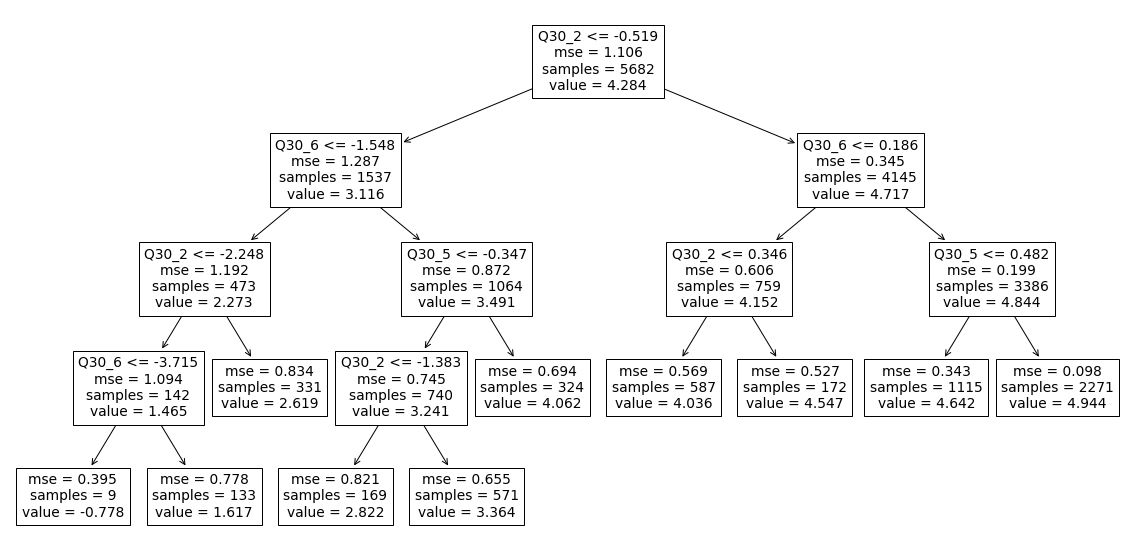

In [42]:
# CART

CART = tree.DecisionTreeRegressor( random_state = 0, max_depth = 5, max_leaf_nodes = 10)
CART = CART.fit(X_train,y_train)
plt.figure(figsize = (20,10))
tree.plot_tree(CART, feature_names = data_cca.drop(['WEIGHT','ID','VARUNIT', 'Q30_4'], axis=1).columns)
plt.show()

In [400]:
y_pred_CART = CART.predict(X_test)
print("CART Accuracy", (y_test == np.round(y_pred_CART)).sum()/X_test.shape[0])


CART Accuracy 0.4665728360309641


In [410]:
cart_paras = data_cca.drop(['WEIGHT','ID','VARUNIT','Q30_4'], axis=1).columns[[32, 35, 34]]
cart_paras

Index(['Q30_2', 'Q30_6', 'Q30_5'], dtype='object')

In [340]:
CART.decision_path(X_train)

<5682x19 sparse matrix of type '<class 'numpy.int64'>'
	with 24039 stored elements in Compressed Sparse Row format>

In [341]:
list(set(lasso_paras).intersection(net_paras))

['Q30_1',
 'Q30_6',
 'Q30_5',
 'Q30_2',
 'Q56_4',
 'Q37',
 'Q30_3',
 'PPINCIMP',
 'FOOD_INSEC']